<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [13]:
# Write your code here
import nltk
nltk.download()






showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [14]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

zsh:1: command not found: apt-get
The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.

cp: /usr/lib/chromium-browser/chromedriver: No such file or directory
Defaulting to user installation because normal site-packages is not writeable


In [15]:
from selenium import webdriver#importing selenium package
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [16]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [17]:
reviews=pd.read_csv('Titanicc_reviews.csv')
print(reviews)

                                                Review
0    I have watched Titanic how many times I don't ...
1    The stage curtains open ...Not since the adven...
2    Very beautiful and cinematic movie with lots o...
3    Ah, yes, the film that propelled Leonardi DiCa...
4    Back in 1997, do I remember that year: Clinton...
..                                                 ...
114  The low rating makes no sense to me at all... ...
115  You can watch this movie in 1997, you can watc...
116  This is one of the best movies in my opinion. ...
117  Titanic is one of my all time favourite films....
118  I am still crying as I am writing this review ...

[119 rows x 1 columns]


In [18]:
#Lower Case
reviews['After Converting to lower case'] = reviews['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
reviews

#Punctuation Removal
reviews['After Removing Punctuation'] = reviews['After Converting to lower case'].str.replace('[^\w\s]','')
reviews

#Special Charachters Removal
import re
reviews['After Removing Special Charachters'] = reviews['After Removing Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
reviews

#Stopwords Removal
from nltk.corpus import stopwords
stop = stopwords.words('english')
reviews['After Removing Stopwords'] =reviews['After Removing Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
reviews

#Spelling Correction
from textblob import TextBlob
reviews['After Spelling Correction'] = reviews['After Removing Stopwords'].apply(lambda x: str(TextBlob(x).correct()))
reviews

#Tokenization
import nltk
nltk.download('punkt')
reviews['After Tokenization'] = reviews['After Spelling Correction'].apply(lambda x: TextBlob(x).words)
reviews


#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
reviews['After Stemming'] = reviews['After Tokenization'].apply(lambda x: " ".join([ps.stem(word) for word in x]))
reviews

#Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')
reviews['After Lemmatization'] =reviews['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
reviews.to_csv('reviews.csv',index=False)
reviews

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sakethmylavarapu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sakethmylavarapu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Review,After Converting to lower case,After Removing Punctuation,After Removing Special Charachters,After Removing Stopwords,After Spelling Correction,After Tokenization,After Stemming,After Lemmatization
0,I have watched Titanic how many times I don't ...,i have watched titanic how many times i don't ...,i have watched titanic how many times i don't ...,i have watched titanic how many times i don t ...,watched titanic many times know. everytime wat...,watched titanic many times know. everytime wat...,"[watched, titanic, many, times, know, everytim...",watch titan mani time know everytim watch it s...,watch titan mani time know everytim watch it s...
1,The stage curtains open ...Not since the adven...,the stage curtains open ...not since the adven...,the stage curtains open ...not since the adven...,the stage curtains open not since the adven...,stage curtains open ...not since advent 1995 f...,stage curtains open ...not since advent 1995 f...,"[stage, curtains, open, not, since, advent, 19...",stage curtain open not sinc advent 1995 film b...,stage curtain open not sinc advent 1995 film b...
2,Very beautiful and cinematic movie with lots o...,very beautiful and cinematic movie with lots o...,very beautiful and cinematic movie with lots o...,very beautiful and cinematic movie with lots o...,beautiful cinematic movie lots classic scenes....,beautiful cinematic movie lots classic scenes....,"[beautiful, cinematic, movie, lots, classic, s...",beauti cinemat movi lot classic scenes.also ex...,beauti cinemat movi lot classic scenes.also ex...
3,"Ah, yes, the film that propelled Leonardi DiCa...","ah, yes, the film that propelled leonardi dica...","ah, yes, the film that propelled leonardi dica...",ah yes the film that propelled leonardi dica...,"ah, yes, film propelled leonardi dicapro super...","ah, yes, film repelled leopard dicapro super s...","[ah, yes, film, repelled, leopard, dicapro, su...",ah ye film repel leopard dicapro super stardom...,ah ye film repel leopard dicapro super stardom...
4,"Back in 1997, do I remember that year: Clinton...","back in 1997, do i remember that year: clinton...","back in 1997, do i remember that year: clinton...",back in 1997 do i remember that year clinton...,"back 1997, remember year: clinton bans cloning...","back 1997, remember year: clinton bank closing...","[back, 1997, remember, year, clinton, bank, cl...",back 1997 rememb year clinton bank close resea...,back 1997 rememb year clinton bank close resea...
...,...,...,...,...,...,...,...,...,...
114,The low rating makes no sense to me at all... ...,the low rating makes no sense to me at all... ...,the low rating makes no sense to me at all... ...,the low rating makes no sense to me at all ...,low rating makes sense all... movie magnificen...,low rating makes sense all... movie magnificen...,"[low, rating, makes, sense, all, movie, magnif...",low rate make sens all movi magnific well made...,low rate make sen all movi magnific well made ...
115,"You can watch this movie in 1997, you can watc...","you can watch this movie in 1997, you can watc...","you can watch this movie in 1997, you can watc...",you can watch this movie in 1997 you can watc...,"watch movie 1997, watch 2004 2009 watch 2015 2...","watch movie 1997, watch 2004 2009 watch 2015 2...","[watch, movie, 1997, watch, 2004, 2009, watch,...",watch movi 1997 watch 2004 2009 watch 2015 202...,watch movi 1997 watch 2004 2009 watch 2015 202...
116,This is one of the best movies in my opinion. ...,this is one of the best movies in my opinion. ...,this is one of the best movies in my opinion. ...,this is one of the best movies in my opinion ...,one best movies opinion. cast amazing love all...,one best moves opinion. cast amazing love all!...,"[one, best, moves, opinion, cast, amazing, lov...",one best move opinion cast amaz love all stori...,one best move opinion cast amaz love all stori...
117,Titanic is one of my all time favourite films....,titanic is one of my all time favourite film

In [19]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

array= []
for i in reviews['After Lemmatization']:
  array.append(word_tokenize(i))
cleaned_data = [x for x in array if x != []]
repeat = list(itertools.chain.from_iterable(cleaned_data))

trigrams = nltk.trigrams(repeat)
FD = nltk.FreqDist(trigrams)
FD

FreqDist({('movi', 'i', "'ve"): 10, ('stori', 'jack', 'rose'): 10, ('jack', 'rose', "'s"): 10, ('high', 'school', 'public'): 10, ('school', 'public', 'speak'): 10, ('public', 'speak', 'contest'): 10, ('draw', 'young', 'woman'): 9, ('young', 'woman', 'wear'): 9, ('love', 'hate', 'it'): 9, ('i', "'ll", 'give'): 9, ...})

In [20]:
from collections import Counter
bg = nltk.bigrams(repeat)
FD = nltk.FreqDist(bg)
bg_dict = dict(FD)
for i in bg_dict:
  print( str(i) + ':' + str(bg_dict[i] / repeat.count(i[0])))

('watch', 'titan'):0.09933774834437085
('titan', 'mani'):0.021929824561403508
('mani', 'time'):0.1388888888888889
('time', 'know'):0.047619047619047616
('know', 'everytim'):0.06329113924050633
('everytim', 'watch'):1.0
('watch', 'it'):0.06622516556291391
('it', 'still'):0.047619047619047616
('still', 'cri'):0.17857142857142858
('cri', 'laugh'):0.11627906976744186
('laugh', 'smile'):1.0
('smile', 'feel'):1.0
('feel', 'stori'):0.14705882352941177
('stori', 'flow'):0.035211267605633804
('flow', 'tension'):0.5555555555555556
('tension', 'throughout'):1.0
('throughout', 'movi'):1.0
('movi', 'two'):0.015337423312883436
('two', 'actor'):0.25
('actor', 'act'):0.35714285714285715
('act', 'chemistri'):0.11904761904761904
('chemistri', 'need'):0.2631578947368421
('need', 'applaud'):1.0
('applaud', 'sink'):0.5
('sink', 'ship'):0.05747126436781609
('ship', 'realist'):0.04
('realist', 'fill'):0.5
('fill', "'mi"):0.2777777777777778
("'mi", 'heart'):1.0
('heart', 'go'):0.11904761904761904
('go', 'on')

In [21]:
complete_data = ''
j= []
count = 1
for i in reviews['After Lemmatization']:
  complete_data = complete_data + i
  k = 'Review-' + str(i)
  j.append(k)
  count+= 1

from textblob import TextBlob
np = []
fcy = []
for i in reviews['After Lemmatization']:
  blob = TextBlob(i)
  for nouns in blob.noun_phrases:
    np.append(nouns)
for w in np:
  npf = []
  for i in reviews['After Lemmatization']:
    npf.append(i.count(w) / complete_data.count(w))
  fcy.append(np)
noun_phrases_Data = pd.DataFrame(fcy).T
noun_phrases_Data.columns = list(np)
noun_phrases_Data.j = j
noun_phrases_Data

/var/folders/tq/2t3m9ydj1hbbty8hxcbnnjgh0000gq/T/ipykernel_17042/1078682186.py:24: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  noun_phrases_Data.j = j


,titan mani time,cri laugh smile,stori flow tension,actor act chemistri need,ship realist,'mi heart,perfect fit jack,stori tireless,movi 's factor fulli qualifi,stage curtain,...,word describ beauti everyth,full life heart,battl class ca n't togeth ounc,human realli,whole new level camerawork,spoil thrill shill beauti,part film someth,experi devast heartbreak tragedi,jame cameron alway,ultim masterpiec
0,titan mani time,titan mani time,titan mani time,titan mani time,titan mani time,titan mani time,titan mani time,titan mani time,titan mani time,titan mani time,...,titan mani time,titan mani time,titan mani time,titan mani time,titan mani time,titan mani time,titan mani time,titan mani time,titan mani time,titan mani time
1,cri laugh smile,cri laugh smile,cri laugh smile,cri laugh smile,cri laugh smile,cri laugh smile,cri laugh smile,cri laugh smile,cri laugh smile,cri laugh smile,...,cri laugh smile,cri laugh smile,cri laugh smile,cri laugh smile,cri laugh smile,cri laugh smile,cri laugh smile,cri laugh smile,cri laugh smile,cri laugh smile
2,stori flow tension,stori flow tension,stori flow tension,stori flow tension,stori flow tension,stori flow tension,stori flow tension,stori flow tension,stori flow tension,stori flow tension,...,stori flow tension,stori flow tension,stori flow tension,stori flow tension,stori flow tension,stori flow tension,stori flow tension,stori flow tension,stori flow tension,stori flow tension
3,actor act chemistri need,actor act chemistri need,actor act chemistri need,actor act chemistri need,actor act chemistri need,actor act chemistri need,actor act chemistri need,actor act chemistri need,actor act chemistri need,actor act chemistri need,...,actor act chemistri need,actor act chemistri need,actor act chemistri need,actor act chemistri need,actor act chemistri need,actor act chemistri need,actor act chemistri need,actor act chemistri need,actor act chemistri need,actor act chemistri need
4,ship realist,ship realist,ship realist,ship realist,ship realist,ship realist,ship realist,ship realist,ship realist,ship realist,...,ship realist,ship realist,ship realist,ship realist,ship realist,ship realist,ship realist,ship realist,ship realist,ship realist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,...,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti,spoil thrill shill beauti
2354,part film someth,part film someth,part film someth,part film someth,part film someth,part film someth,part film someth,part film someth,part film someth,part film someth,...,part film someth,part film someth,part film someth,part film someth,part film someth,part film someth,part film someth,part film someth,part film someth,part film someth
2355,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,...,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi,experi devast heartbreak tragedi
2356,jame cameron alway,jame cameron alway,jame cameron alway,jame cameron alway,jame cameron alway,jame cameron alway,jame cameron alway,jame camero

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [22]:
# Write your code here
import math
sentences = reviews["After Spelling Correction"].values.tolist()
words = set([j for i in sentences for j in i.split(" ")])
tf_idf_df = pd.DataFrame(words, columns=["words"])
count=1

def tf_idf(x,sentence):
  value = sentence.count(x)
  size = len(sentence.split(" "))
  if(value != 0):
    return (value/size)*(math.log(size/value, 10))
  else:
    return 0
    
for sentence in sentences:
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
  count=count+1
tf_idf_df






/var/folders/tq/2t3m9ydj1hbbty8hxcbnnjgh0000gq/T/ipykernel_17042/1058170622.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/tq/2t3m9ydj1hbbty8hxcbnnjgh0000gq/T/ipykernel_17042/1058170622.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
/var/folders/tq/2t3m9ydj1hbbty8hxcbnnjgh0000gq/T/ipykernel_17042/1058170622.py:17: PerformanceWarnin

,words,Review1,Review2,Review3,Review4,Review5,Review6,Review7,Review8,Review9,...,Review110,Review111,Review112,Review113,Review114,Review115,Review116,Review117,Review118,Review119
0,looks,0.0,0.000000,0.0,0.000000,0.005615,0.0,0.0,0.00000,0.000000,...,0.009088,0.000000,0.00000,0.000000,0.02526,0.000000,0.000000,0.000000,0.000000,0.000000
1,commitment,0.0,0.000000,0.0,0.000000,0.005615,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,life.,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.02665,0.024258,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"alarms,",0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.01443,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,enough,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.01443,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,"comments,",0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1779,us,0.0,0.028222,0.0,0.030208,0.017413,0.0,0.0,0.00000,0.040797,...,0.027333,0.037988,0.00000,0.008589,0.00000,0.081866,0.000000,0.030805,0.032231,0.029636
1780,guy.,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1781,form.we,0.0,0.011892,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

search_sentence="  Excellent movie, All the actors did a fabulous work."
X_list = word_tokenize(search_sentence)
stop_word = stopwords.words('english') 
X_set = {i for i in X_list if not i in stop_word}

def cv(X_set, Y_set):
  r_vector = X_set.union(Y_set)
  list1 =[];list2 =[]
  for j in r_vector: 
      if j in X_set: list1.append(1)
      else: list1.append(0) 
      if j in Y_set: list2.append(1) 
      else: list2.append(0)
  return r_vector, list1, list2

def cc(r_vector, l1, l2):
  count = 0
  for i in range(len(r_vector)): 
        count+= list1[i]*list2[i] 
  c = count / float((sum(list1)*sum(list2))**0.5) 
  return c


list3 = []
for l in reviews['After Spelling Correction']:
  Y_list = word_tokenize(l)
  Y_set = {k for k in Y_list if not k in stop_word}
  r_vector, list1, list2 = cv(X_set, Y_set)
  try:
    similarity = cc(r_vector, list1, list2)
  except ZeroDivisionError:
    similarity = 'None'
  list3.append(similarity)
Data2 = pd.DataFrame(list(zip(reviews['Review'],list3)), columns=['Review','cosine cimilarity'])
Data2

,Review,cosine cimilarity
0,I have watched Titanic how many times I don't ...,0.204124
1,The stage curtains open ...Not since the adven...,0.113592
2,Very beautiful and cinematic movie with lots o...,0.204124
3,"Ah, yes, the film that propelled Leonardi DiCa...",0.068041
4,"Back in 1997, do I remember that year: Clinton...",0.058037
...,...,...
114,The low rating makes no sense to me at all... ...,0.265165
115,"You can watch this movie in 1997, you can watc...",0.139272
116,This is one of the best movies in my opinion. ...,0.153093
117,Titanic is one of my all time favourite films....,0.089009


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [24]:
# Write your code here
!pip install --upgrade gensim

import gensim
from gensim import models

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot






Defaulting to user installation because normal site-packages is not writeable


In [25]:
docs = [word.split() for word in reviews['After Lemmatization'] if str(word) != 'nan' and str(word) != '']
model = models.Word2Vec(docs,vector_size=300)
words = list(model.wv.index_to_key)
print(words)

['movi', 'film', 'titan', 'time', 'love', "'s", 'watch', 'stori', 'one', 'ship', 'rose', 'it', 'jack', 'well', 'go', 'even', 'see', 'i', 'sink', 'like', 'great', 'life', 'first', 'know', 'year', 'think', 'cameron', 'everi', 'ever', 'charact', 'right', 'jame', 'make', 'much', 'amaz', 'made', 'never', 'beauti', 'good', 'still', 'thought', 'get', 'winslet', 'dicaprio', 'realli', 'kate', 'perfect', 'water', 'night', 'that', 'thi', 'class', 'cri', 'leopard', 'heart', 'detail', 'would', 'act', 'seen', 'peopl', 'live', 'set', 'classic', 'girl', 'everyon', "'ve", 'move', 'work', 'mani', 'u', 'epic', 'look', 'want', 'give', 'old', 'disast', 'feel', 'end', 'masterpiec', 'done', 'iceberg', 'put', 'rememb', 'saw', 'romanc', 'young', 'lot', 'back', 'place', 'hope', 'sen', 'perform', 'complet', 'part', 'must', 'almost', 'felt', 'best', 'take', 'music', 'mother', 'sinc', 'on', 'probabl', 'emot', 'effect', 'there', 'actual', 'absolut', 'bit', 'show', 'togeth', 'board', 'say', 'true', 'come', 'strike',

In [26]:
model.wv.save_word2vec_format('model.bin')
#model.wv.save_word2vec_format('model.txt', binary=False)
model.save('model.bin')
print(model)

Word2Vec<vocab=1047, vector_size=300, alpha=0.025>


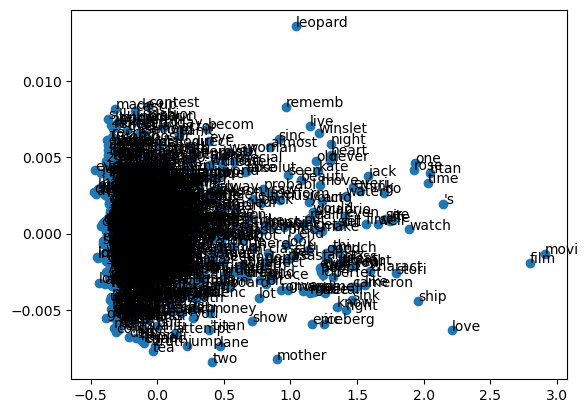

In [27]:
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [28]:
# The GitHub link of your final csv file



# Link: https://github.com/AlekyaMadiReddy/Alekya_INFO5731_Fall2023/blob/main/reviews.csv



